Author : Shagun Sood

### Predictions using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets as ds
data = ds.load_iris()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data;

### Defining the target variable

In [5]:
X = pd.DataFrame(data = data.data, columns=data.feature_names)
print(X.head(5))

Y = pd.DataFrame(data.target)
print(Y[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   0
0  0
1  0
2  0
3  0
4  0


### Splitting the data into training and test sets

In [6]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=200)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
99,5.7,2.8,4.1,1.3
92,5.8,2.6,4.0,1.2
4,5.0,3.6,1.4,0.2
97,6.2,2.9,4.3,1.3


### Creating and Fitting the decision tree model

In [7]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9666666666666667

### Representing the Decision Tree Algorithm Visually

In [8]:
data_dir = "C:/Users/Shagun/Documents/Python Scripts/GRIP"
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1","2"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [10]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [11]:
from IPython.display import Image

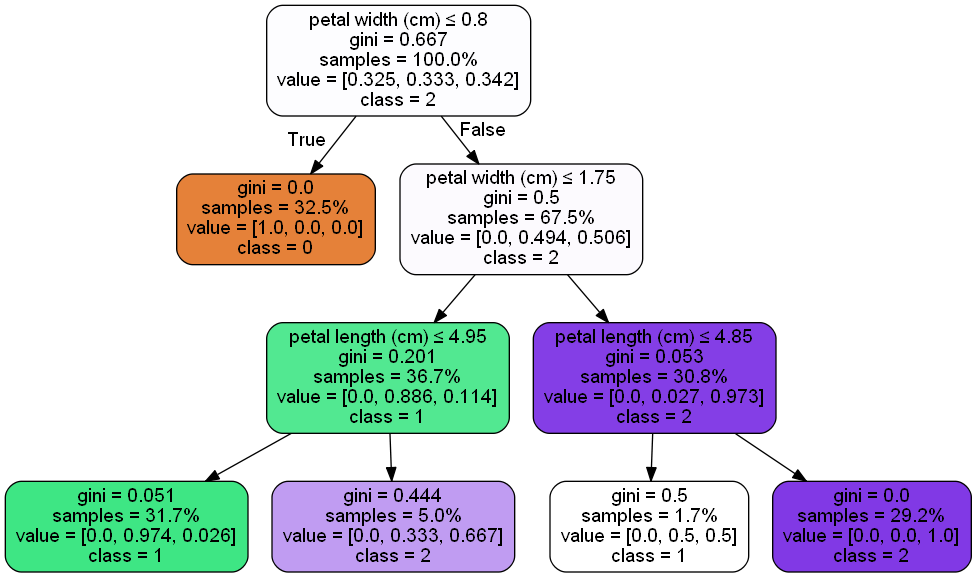

In [12]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [13]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [14]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

C:\Users\Shagun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shagun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [15]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [16]:
mod.best_score_

0.95

Thanks!